# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [61]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Definition of the parameters

In [62]:
alpha = 1/3
beta = 2/3
omega_A = np.array([0.8, 0.3])
omega_B = 1 - omega_A
p2 = 1
N=75

Defintion of the utility functions

In [63]:
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

Defintion of the demand functions

In [64]:
def demand_A(p1, omega_A=omega_A):
    x1_star = alpha * (omega_A[0]*p1 + omega_A[1]*p2) / p1
    x2_star = (1-alpha) * (omega_A[0]*p1 + omega_A[1]*p2) / p2
    return np.array([x1_star, x2_star])

def demand_B(p1, omega_B=omega_B):
    x1_star = beta * (omega_B[0]*p1 + omega_B[1]*p2) / p1
    x2_star = (1-beta) * (omega_B[0]*p1 + omega_B[1]*p2) / p2
    return np.array([x1_star, x2_star])

# Question 1

In question 1, we want to illustrate the given set in the Edgdeworth box

Based on the provided code, we xxx

Following this, we find the 

**Explain how you solve the model**

In [65]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


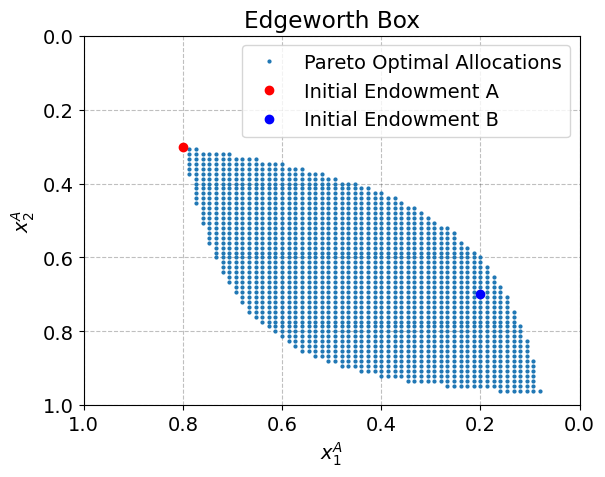

In [66]:
# We have aldready defined our parameters and our utility functions

# We now define our initial utility levels with given endowments
initial_u_A = uA(*omega_A)
initial_u_B = uB(*omega_B)


# Then we create a range of x1 and x2 values
x1_range = np.linspace(0, 1, N+1)
x2_range = np.linspace(0, 1, N+1)

# We initialize lists to hold Pareto optimal allocations
pareto_x1_A = []
pareto_x2_A = []
pareto_x1_B = []
pareto_x2_B = []

# Then we Iterate over all possible allocations for A and B
for x1_A in x1_range:
    for x2_A in x2_range:
        # Calculate remaining goods for B
        x1_B = 1 - x1_A
        x2_B = 1 - x2_A

        # Check if this allocation is Pareto optimal
        if u_A(x1_A, x2_A) >= initial_u_A and u_B(x1_B, x2_B) >= initial_u_B:
            pareto_x1_A.append(x1_A)
            pareto_x2_A.append(x2_A)
            pareto_x1_B.append(x1_B)
            pareto_x2_B.append(x2_B)

# Plot the Edgeworth Box
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot(pareto_x1_A, pareto_x2_A, 'o', markersize=2, label="Pareto Optimal Allocations")
ax.plot(omega_A[0], omega_A[1], 'ro', label="Initial Endowment A")
ax.plot(omega_B[0], omega_B[1], 'bo', label="Initial Endowment B")
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.legend()
ax.set_title('Edgeworth Box')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Show the plot
plt.show()


# Question 2

Explain your code and procedure

In [67]:
# code

# Question 3

Explain your code and procedure

In [68]:
# code

ADD CONCISE CONLUSION.

# Question 4a

# Question 4b

# Question 5a

# Question 5b

# Question 6a

# Question 6b

# Question 7

# Question 8